## 라이브러리, 데이터프레임

In [34]:
from geoband.API import *
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import folium
import numpy as np
import googlemaps
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from shapely.geometry import Point, Polygon
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('max_rows', 300)
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
import random
from scipy.stats import expon, reciprocal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from numpy import array
# from keras.models import Sequential
# from keras.layers import Dense, LSTM
# from keras.models import load_model
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from random import *

GetCompasData('SBJ_2107_003', '14', '14.부산시남구_행정경계(읍면동).geojson')
GetCompasData('SBJ_2107_003', '15', '15.부산시남구_격자(300X300).geojson')
GetCompasData('SBJ_2107_003', '3', '3.부산시남구_주차장현황')

df = pd.read_csv('./total.csv')
df_1 = pd.read_csv('./total.csv')
df14 = json.load(open('./14.부산시남구_행정경계(읍면동).geojson'))
df15 = json.load(open('./15.부산시남구_격자(300X300).geojson'))
df3 = pd.read_csv('./3.부산시남구_주차장현황')
df3 = df3[df3['park_type_gbn'] == '공영']

## 분석에 사용할 데이터프레임
동별 또는 id의 근사치인 district별로 구분한 데이터를 연도별 또는 월별로 합쳐서 분석에 활용

In [35]:
df.head().T

,0,1,2,3,4
cd_date,2018-09-17,2018-01-11,2018-01-11,2018-02-08,2019-02-01
cd_loc,용호동 분포로 하이츠자이 상가 부근,용호동 분포로 하이츠자이 상가 부근,용호동 분포로 하이츠자이 상가 부근,용호동 분포로 하이츠자이 상가 부근,용호동 분포로 하이츠자이 상가 부근
cd_cm_addr,강원도 강릉시 강동면 단경로,경기도 성남시 중원구 갈마치로,경기도 성남시 중원구 금상로,경기도 양주시 은현면 화합로,경상남도 김해시 유하로
cd_type,스마트폰단속,스마트폰단속,스마트폰단속,스마트폰단속,스마트폰단속
lat,35.13277,35.13277,35.13277,35.13277,35.13277
long,129.11095,129.11095,129.11095,129.11095,129.11095
id,608,608,608,608,608
dong,용호1동,용호1동,용호1동,용호1동,용호1동
year,2018,2018,2018,2018,2019
month,9,1,1,2,2


## 동별 주정차위반 이력

대연3동에서 가장 많은 주정차위반이 있었으며, 다른 동은 평이함

In [36]:
keys = df.groupby('dong').size().keys()
values = df.groupby('dong').size().values
temp = pd.DataFrame({'dong' : keys, 'count' : values})

m = folium.Map(location=[35.126703, 129.100194], zoom_start=13, prefer_canvas=True)
folium.GeoJson(df14).add_to(m)
folium.Choropleth(geo_data=df14, data=temp, columns=('dong', 'count'), key_on='feature.properties.ADM_DR_NM', 
                  fill_color='YlGn',legend_name='주정차 위반',).add_to(m)
m

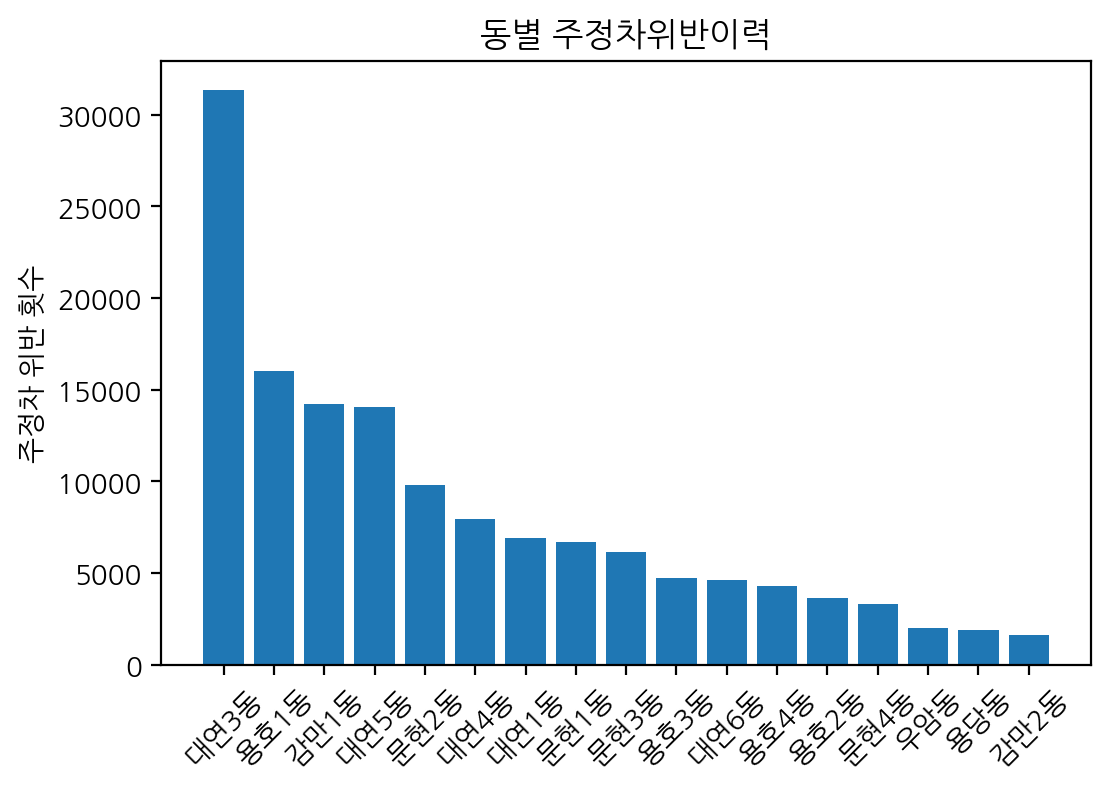

In [37]:
plt.figure(dpi=200)

plt.bar(df.groupby('dong').size().sort_values(ascending=False).index, df.groupby('dong').size().sort_values(ascending=False).values)
plt.xticks(rotation=45)
plt.title('동별 주정차위반이력')
plt.ylabel('주정차 위반 횟수')

plt.show()

## 지역별 주정차위반 이력
지역별로 보면 대연3동을 제외한 지역에도 주정차위반이 집중되어 많이 나타나는 지역이 있는 것을 알 수 있음

In [38]:
index = df.groupby('cd_loc').size().sort_values(ascending=False).index[:15]

m = folium.Map(location=[35.126703, 129.100194], zoom_start=13, prefer_canvas=True)

for i in range(len(index)):
    folium.Circle(location = [df[df['cd_loc'] == index[i]]['lat'].iloc[0], df[df['cd_loc'] == index[i]]['long'].iloc[0]], 
                  radius=float(df.groupby('cd_loc').size().sort_values(ascending=False)[index[i]])*0.2, 
                  color='green', fill_color='green', fill_opacity=0.3, line_opcity=0.1, tooltip = index[i]).add_to(m)
m

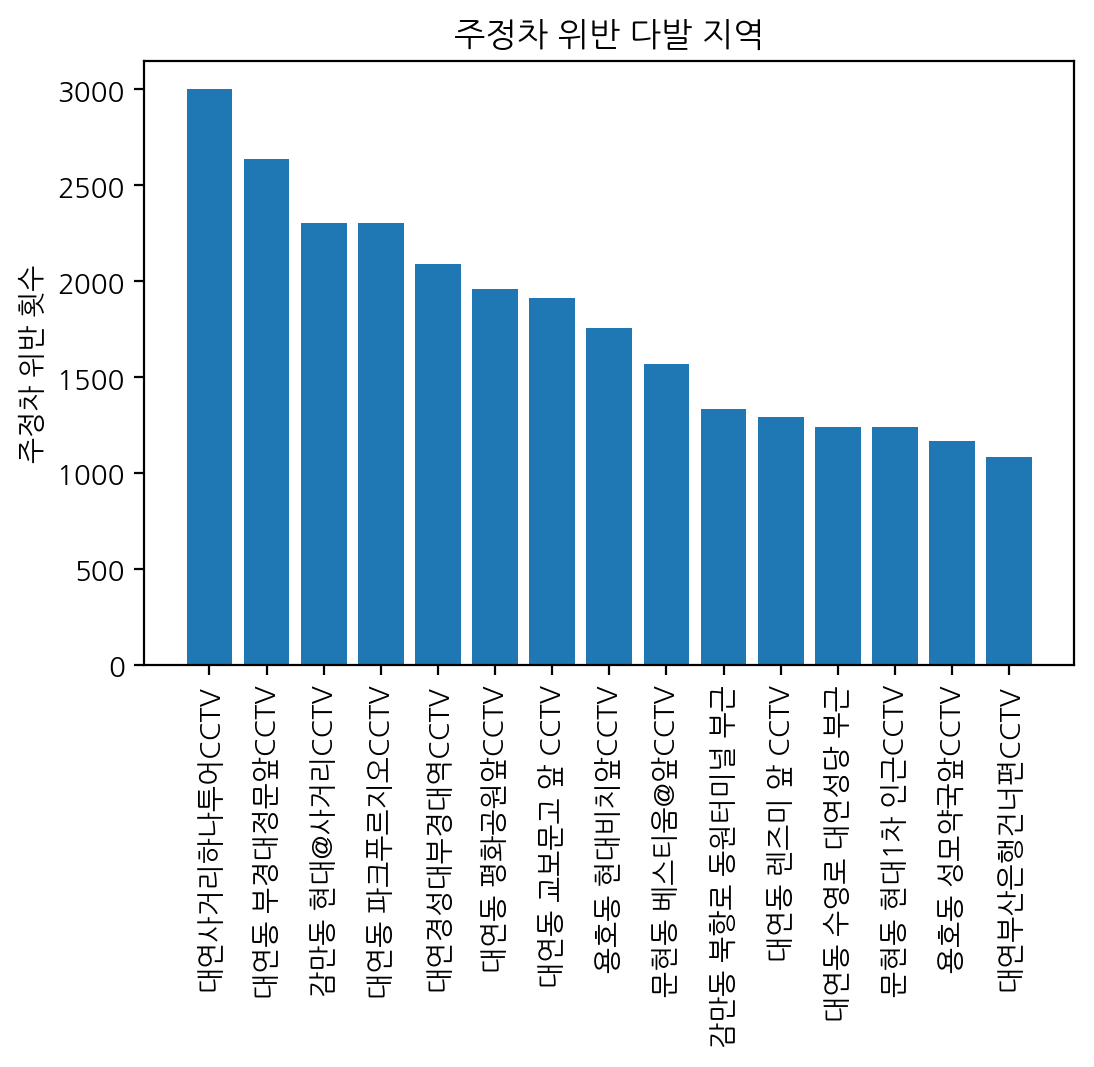

In [39]:
plt.figure(dpi=200)

plt.bar(df.groupby('cd_loc').size().sort_values(ascending=False).index[:15], 
        df.groupby('cd_loc').size().sort_values(ascending=False).values[:15])
plt.xticks(rotation=90)
plt.title('주정차 위반 다발 지역')
plt.ylabel('주정차 위반 횟수')

plt.show()

## 구역별 주정차위반 이력
상대적으로 색이 진한 구역 중 주차장의 설치가 가능한 구역 30개를 선별하여 제시하는 것이 목표

In [40]:
keys = df.groupby('id').size().keys()
values = df.groupby('id').size().values
temp = pd.DataFrame({'id' : keys, 'count' : values})

m = folium.Map(location=[35.126703, 129.100194], zoom_start=13, prefer_canvas=True)
folium.GeoJson(df15).add_to(m)
folium.Choropleth(geo_data=df15, data=temp, columns=('id', 'count'), key_on='feature.properties.id', 
                  fill_color='YlGn',legend_name='주정차 위반',).add_to(m)
m

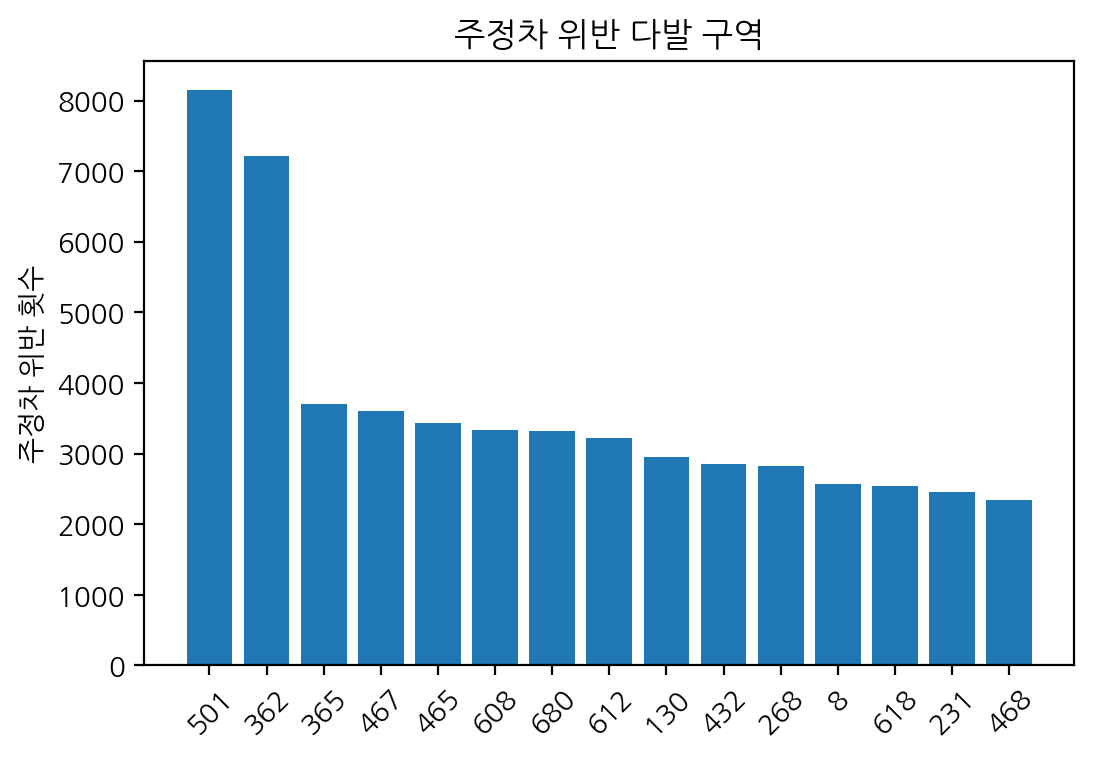

In [41]:
plt.figure(dpi=200)
plt.bar(list(df.groupby('id').size().sort_values(ascending=False).index[:15].astype(str)), 
        list(df.groupby('id').size().sort_values(ascending=False).values[:15]))
plt.xticks(rotation=45)
plt.title('주정차 위반 다발 구역')
plt.ylabel('주정차 위반 횟수')

plt.show()

In [42]:
df.columns

Index(['cd_date', 'cd_loc', 'cd_cm_addr', 'cd_type', 'lat', 'long', 'id',
       'dong', 'year', 'month', 'yearmonth', 'x', 'y', 'center_lat',
       'center_long', 'district', 'dong_1', 'non_bs_city', 'non_bs_compact',
       'non_bs_midsize', 'bs_city', 'bs_compact', 'bs_midsize', 'park_slot_x',
       'park_num', 'park_slot_y', 'in_mec_num', 'in_mec_area', 'out_mec_num',
       'out_mec_area', 'in_sfp_num', 'in_sfp_area', 'out_sfp_num',
       'out_sfp_area', 'age', 'bus_station', '계', '남', '여', 'price'],
      dtype='object')

## 주정차위반 예측 모델
2018년의 데이터로 2020년의 주정차위반을 학습하는 모델을 만들고 <br>
이 모델에 2020년을 투입하여 2022년의 주정차위반을 예측, <br>
2021년을 투입하여 2023년의 주정차위반을 예측 

In [43]:
feature = ['non_bs_city', 'non_bs_compact',
       'non_bs_midsize', 'bs_city', 'bs_compact', 'bs_midsize', 'park_slot_x',
       'park_num', 'park_slot_y', 'in_mec_num', 'in_mec_area', 'out_mec_num', 'out_mec_area',
       'in_sfp_num', 'in_sfp_area', 'out_sfp_num', 'out_sfp_area', 'age',
       'bus_station', '계', '남', '여', 'price']

scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature])

In [44]:
X = df[df['year'] == 2018].groupby(['id', 'month']).mean()
y = pd.DataFrame(df[df['year'] == 2020].groupby(['id', 'month']).size())
temp = pd.merge(X,y,left_index=True, right_index=True, how='inner')
temp[feature]

non_bs_city  non_bs_compact  non_bs_midsize  bs_city  bs_compact  \
id  month                                                                     
8   1          0.42714         0.61407         0.39647  1.00000     0.65241   
    2          0.42714         0.61407         0.39647  1.00000     0.65241   
    3          0.42714         0.61407         0.39647  1.00000     0.65241   
    4          0.42714         0.61407         0.39647  1.00000     0.65241   
    5          0.42714         0.61407         0.39647  1.00000     0.65241   
...                ...             ...             ...      ...         ...   
749 7          0.95143         0.85282         0.89834  0.06250     0.69519   
    8          0.95143         0.85282         0.89834  0.06250     0.69519   
    9          0.95143         0.85282         0.89834  0.06250     0.69519   
    10         0.95143         0.85282         0.89834  0.06250     0.69519   
    11         0.95143         0.85282         0.89834  0.06250     0.69519   

           bs_midsize  park_slot_x  park_num  park_slot_y  in_mec_num  \
id  month                                                               
8   1         0.24908      0.03017   0.04065      0.06381     0.00672   
    2         0.24908      0.03447   0.02871      0.06529     0.00224   
    3         0.24908      0.03663   0.02273      0.06604     0.00000   
    4         0.24908      0.03481   0.02778      0.06541     0.00189   
    5         0.24908      0.03639   0.02337      0.06596     0.00024   
...               ...          ...       ...          ...         ...   
749 7         0.41954      0.00895   0.00758          nan     0.00000   
    8         0.41954      0.00895   0.00758          nan     0.00000   
    9         0.41954      0.00895   0.00758          nan     0.00000   
    10        0.41954      0.00895   0.00758          nan     0.00000   
    11        0.41954      0.00895   0.00758          nan     0.00000   

           in_mec_area  out_mec_num  out_mec_area  in_sfp_num  in_sfp_area  \
id  month                                                                    
8   1          0.00213      0.00000       0.00000     0.00116      0.01171   
    2          0.00071      0.00000       0.00000     0.00130      0.01397   
    3          0.00000      0.00000       0.00000     0.00138      0.01510   
    4          0.00060      0.00000       0.00000     0.00131      0.01415   
    5          0.00008      0.00000       0.00000     0.00137      0.01498   
...                ...          ...           ...         ...          ...   
749 7          0.00000      0.00000       0.00000     0.00025      0.00113   
    8          0.00000      0.00000       0.00000     0.00025      0.00113   
    9          0.00000      0.00000       0.00000     0.00025      0.00113   
    10         0.00000      0.00000       0.00000     0.00025      0.00113   
    11         0.00000      0.00000       0.00000     0.00025      0.00113   

           out_sfp_num  out_sfp_area     age  bus_station       계       남  \
id  month                                                                   
8   1          0.00310       0.00378 0.47894      0.20000 0.06334 0.06913   
    2          0.00347       0.00422 0.47854      0.20000 0.06274 0.06855   
    3          0.00365       0.00444 0.47834          nan 0.06053 0.06564   
    4          0.00349       0.00425 0.47851      0.20000 0.06035 0.06549   
    5          0.00363       0.00442 0.47836      0.20000 0.05968 0.06440   
...                ...           ...     ...          ...     ...     ...   
749 7          0.04541       0.17807 0.22177          nan 0.17402 0.17436   
    8          0.04541       0.17807 0.22177          nan 0.17258 0.17326   
    9          0.04541       0.17807 0.22177          nan 0.17149 0.17188   
    10         0.04541       0.17807 0.22177          nan 0.17040 0.17086   
    11         0.04541       0.17807 0.22177          nan 0.16868 0.16875   

                

## 예측 모델 : 선형회귀, SVR, MLP
위 모델들은 대체로 성능이 떨어지는 것을 확인

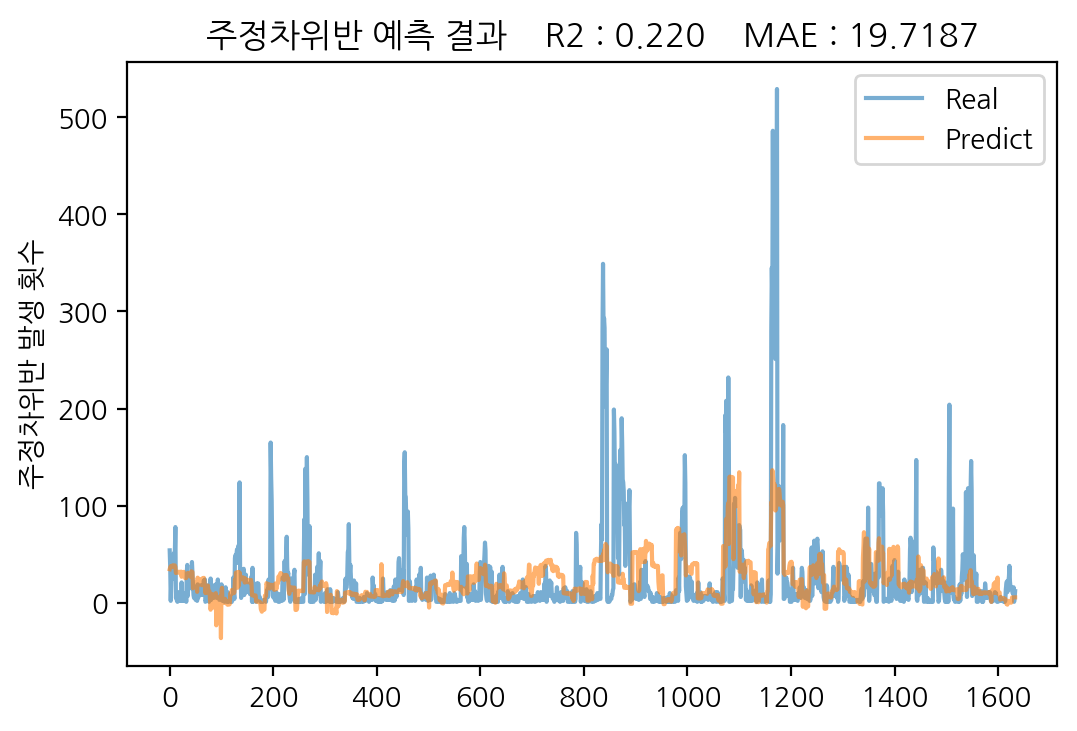

In [45]:
X = temp[feature].fillna(0)
y = temp[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
R2 = mlr.score(X_train, y_train)
MAE = mean_absolute_error(y_test, y_pred)

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('주정차위반 발생 횟수')
plt.plot(np.array(y), alpha = 0.6, label = 'Real')
plt.plot(mlr.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

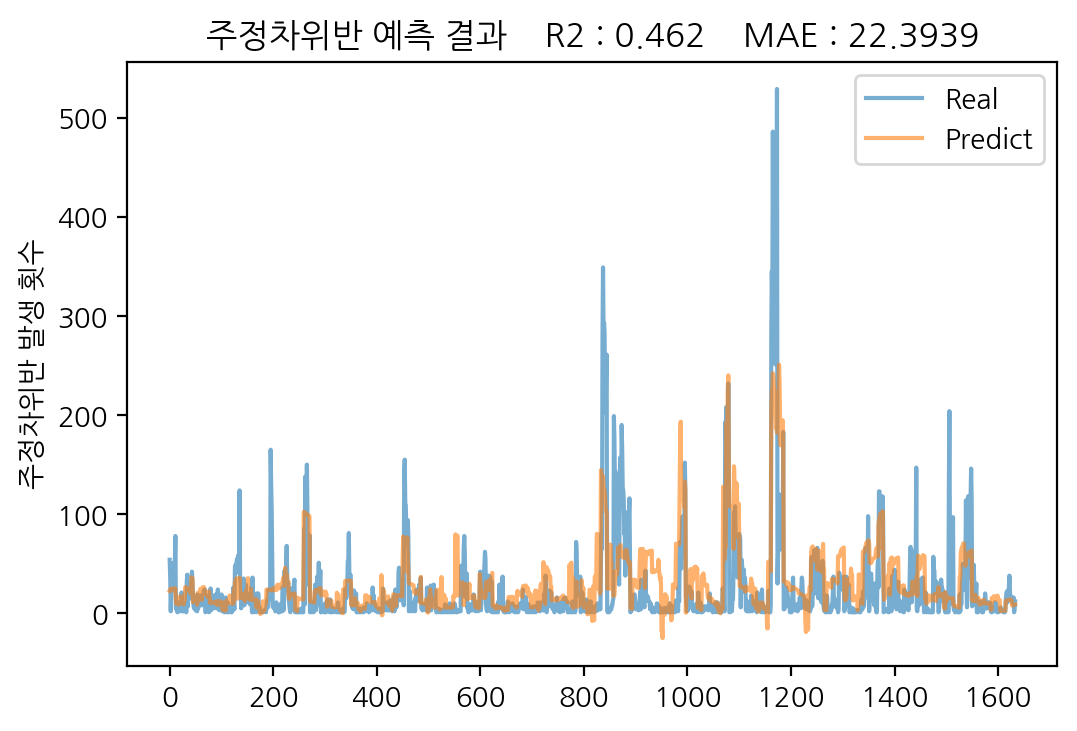

In [46]:
X = df[df['year'] == 2018].groupby(['id', 'month']).mean()
y = pd.DataFrame(df[df['year'] == 2020].groupby(['id', 'month']).size())
temp = pd.merge(X,y,left_index=True, right_index=True, how='inner')

X = temp[feature].fillna(0)
y = temp[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)

mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=200, learning_rate_init=0.1).fit(X_train, y_train)
#mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
R2 = mlp.score(X_train, y_train)
MAE = mean_absolute_error(y_test, y_pred)

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('주정차위반 발생 횟수')
plt.plot(np.array(y), alpha = 0.6, label = 'Real')
plt.plot(mlp.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

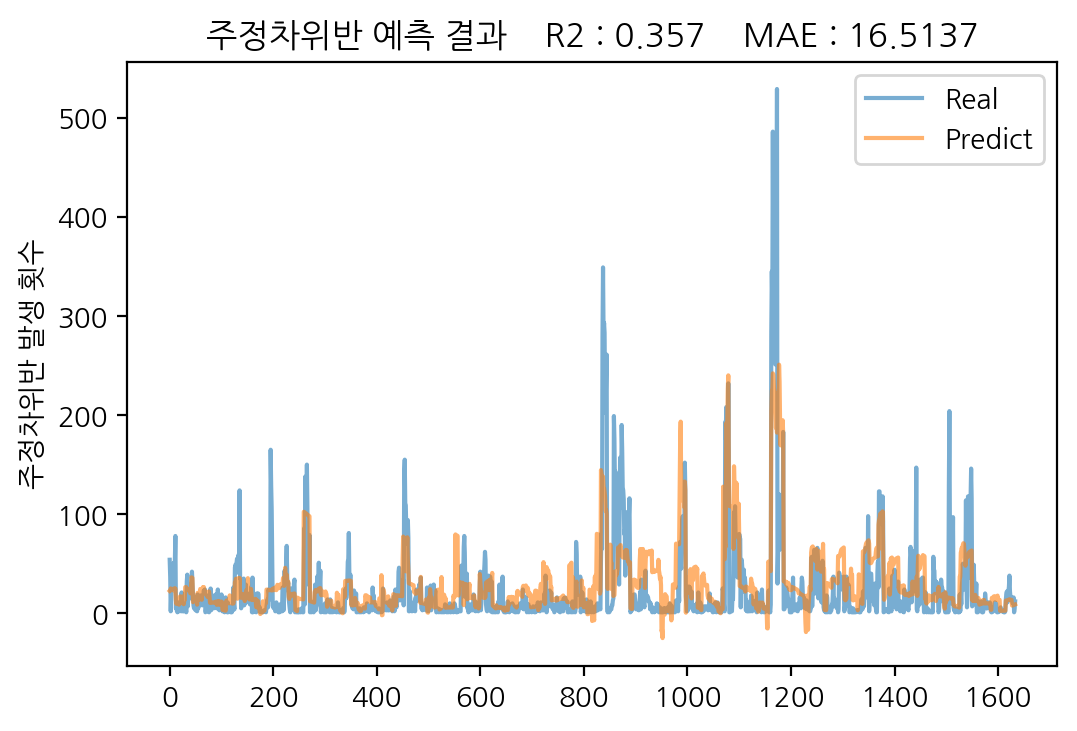

In [47]:
X = df[df['year'] == 2018].groupby(['id', 'month']).mean()
y = pd.DataFrame(df[df['year'] == 2020].groupby(['id', 'month']).size())
temp = pd.merge(X,y,left_index=True, right_index=True, how='inner')

X = temp[feature].fillna(0)
y = temp[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)

svr = SVR(kernel='rbf',  gamma=0.5, epsilon=0.5, C=7000.270317432516, tol=3.0).fit(X_train, y_train)
y_pred = svr.predict(X_test)
R2 = svr.score(X_train, y_train)
MAE = mean_absolute_error(y_test, y_pred)

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('주정차위반 발생 횟수')
plt.plot(np.array(y), alpha = 0.6, label = 'Real')
plt.plot(mlp.predict(X), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

## 딥러닝 모델
딥러닝 모델은 R2 : 0.797, MAE : 11 정도로 대체로 잘 예측하는 모습을 보임

In [48]:
X = df[(df['year'] == 2018)].groupby(['district', 'month']).mean()
y = pd.DataFrame(df[df['year'] == 2020].groupby(['district', 'month']).size())
temp = pd.merge(X,y,left_index=True, right_index = True, how='inner')

X = temp[feature].fillna(0)
y = temp[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)
 
print('x shape : ', X.shape) 
print('y shape : ', y.shape) 

y_test_1 = y_test

X = X.values.reshape(-1, 1, len(feature))
X_train = X_train.values.reshape(-1, 1, len(feature))
X_test  = X_test.values.reshape(-1, 1, len(feature))
y_train = y_train.values.reshape(-1, 1, 1)
y_test = y_test.values.reshape(-1, 1, 1)

x shape :  (1594, 23)
y shape :  (1594,)


In [49]:
model = Sequential()
model.add(Dense(100, input_shape=X[0].shape, activation = 'relu')) 
model.add(Dense(50)) 
model.add(Dense(30))
model.add(Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=500, batch_size=100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1, 100)            2400      
_________________________________________________________________
dense_11 (Dense)             (None, 1, 50)             5050      
_________________________________________________________________
dense_12 (Dense)             (None, 1, 30)             1530      
_________________________________________________________________
dense_13 (Dense)             (None, 1, 1)              31        
Total params: 9,011
Trainable params: 9,011
Non-trainable params: 0
_________________________________________________________________
Train on 1275 samples
Epoch 1/500
1275/1275 [==============================] - 0s 269us/sample - loss: 2300.4190
Epoch 2/500
1275/1275 [==============================] - 0s 19us/sample - loss: 2117.6551
Epoch 3/500
1275/1275 [========================

In [50]:
model.save('model.h5')

In [51]:
# model.save('model123.h5')

## 예측 모델 선정
R2, MAE 모두 가장 좋은 지표를 보인 <br>
딥러닝 모델을 주정차위반 예측 모델로 선정

In [52]:
model = load_model('model.h5')

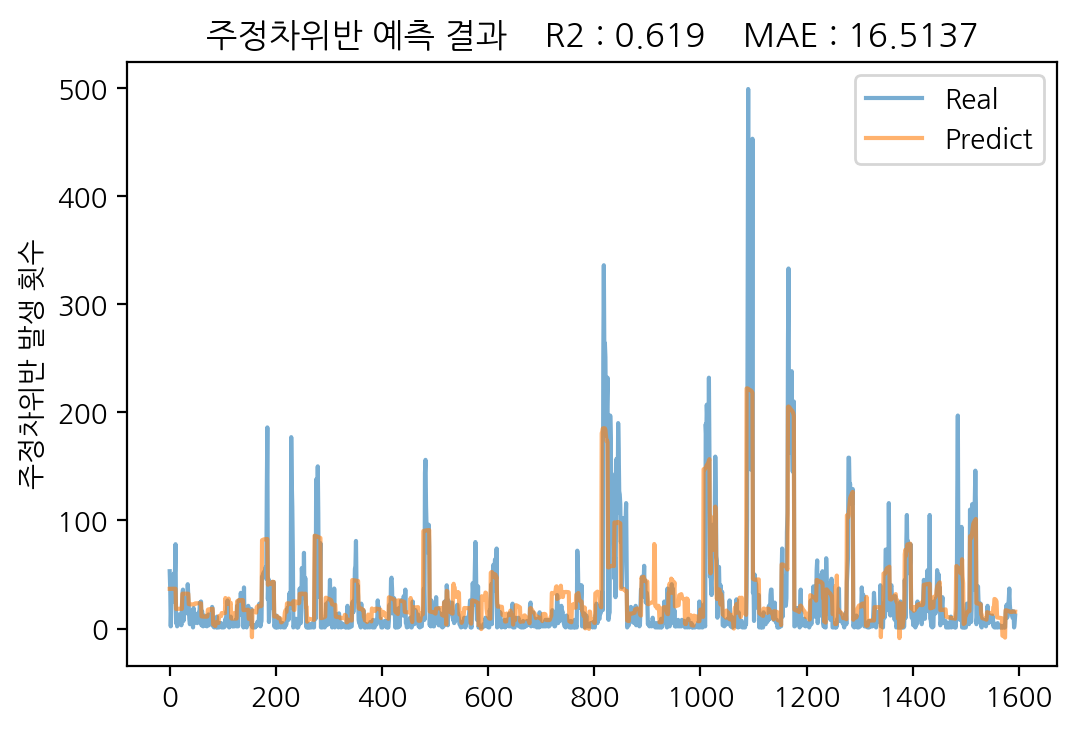

In [53]:
y_pred = model.predict(X_test)
R2 = r2_score(y_test_1, y_pred.reshape(-1, 1))

MSE = mean_absolute_error(y_test_1, y_pred.reshape(-1, 1))

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('주정차위반 발생 횟수')
plt.plot(np.array(y), alpha = 0.6, label = 'Real')
plt.plot(model.predict(X).reshape(-1, 1), alpha = 0.6, label = 'Predict')
plt.legend()
plt.show()

## 2022년의 구역별 주정차위반 예측
위에서 만든 딥러닝 모델에 2020년의 데이터를 투입하여 2022년의 구역별 주정차위반을 예측한 결과

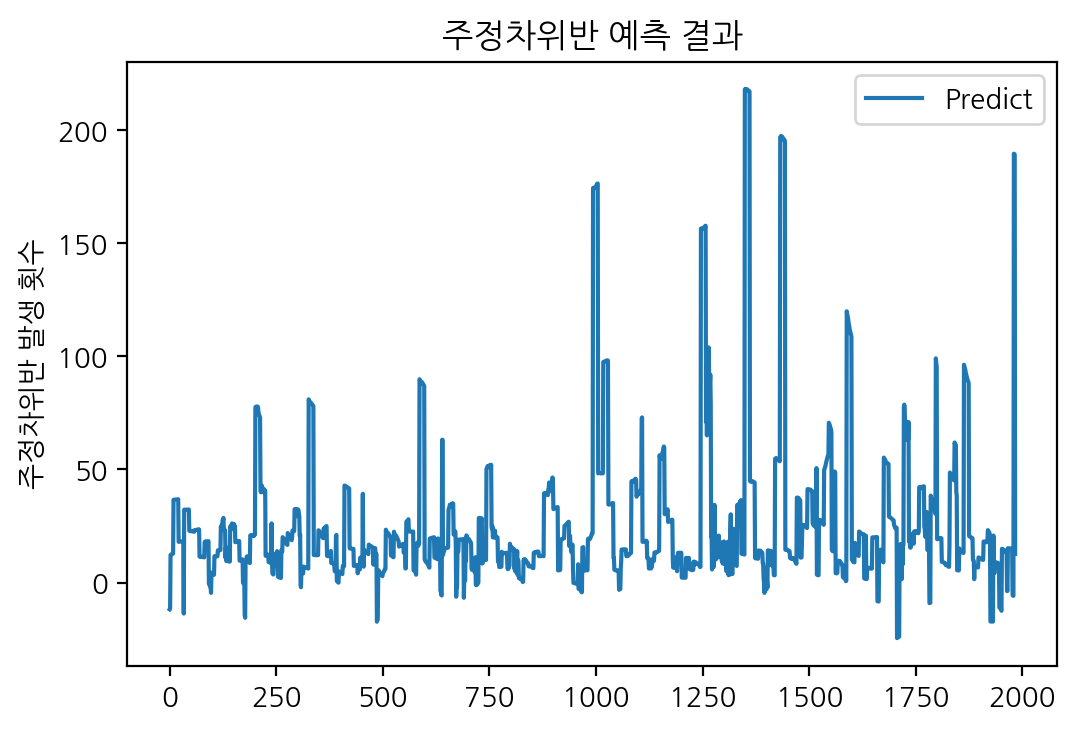

In [54]:
X = df[(df['year'] == 2020)].groupby(['district', 'month']).mean()[feature].fillna(0)
X = X.values.reshape(-1, 1, len(feature))

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과')
plt.ylabel('주정차위반 발생 횟수')
plt.plot(model.predict(X).reshape(-1, 1), alpha = 1.0, label = 'Predict')
plt.legend()
plt.show()

In [55]:
temp = np.ravel(model.predict(X).reshape(-1, 1), order='C').tolist()
df2022 = df[df['year'] == 2020].groupby(['district', 'month']).mean()
df2022['count'] = temp
df2022 = df2022.groupby('district').mean()
temp = df2022.groupby('district').mean()['count'] - df[df['year'] == 2020].groupby(['district']).size()
df2022['increasing'] = temp
df2022 = df2022[df2022['increasing'] > 0].sort_values('increasing',  ascending=False)[:75][['lat', 'long', 'id', 'age', 'price', 'count', 'increasing']]
df2022['id'] = df2022['id'].astype(int)
df2022.head()

,lat,long,id,age,price,count,increasing
district,,,,,,,
773,35.10278,129.11919,727,0.14985,0.00430,189.38851,184.38851
673,35.12889,129.11436,680,0.25174,0.26204,97.14614,88.14614
403,35.12924,129.09296,382,0.40458,0.21724,72.81906,67.81906
278,35.14225,129.08459,289,0.31168,0.00478,63.07476,60.07476
680,35.11018,129.11314,662,0.49224,0.21754,61.23522,56.23522


## 2023년의 구역별 주정차위반 예측
위에서 만든 딥러닝 모델에 2021년의 데이터를 투입하여 2023년의 구역별 주정차위반을 예측한 결과

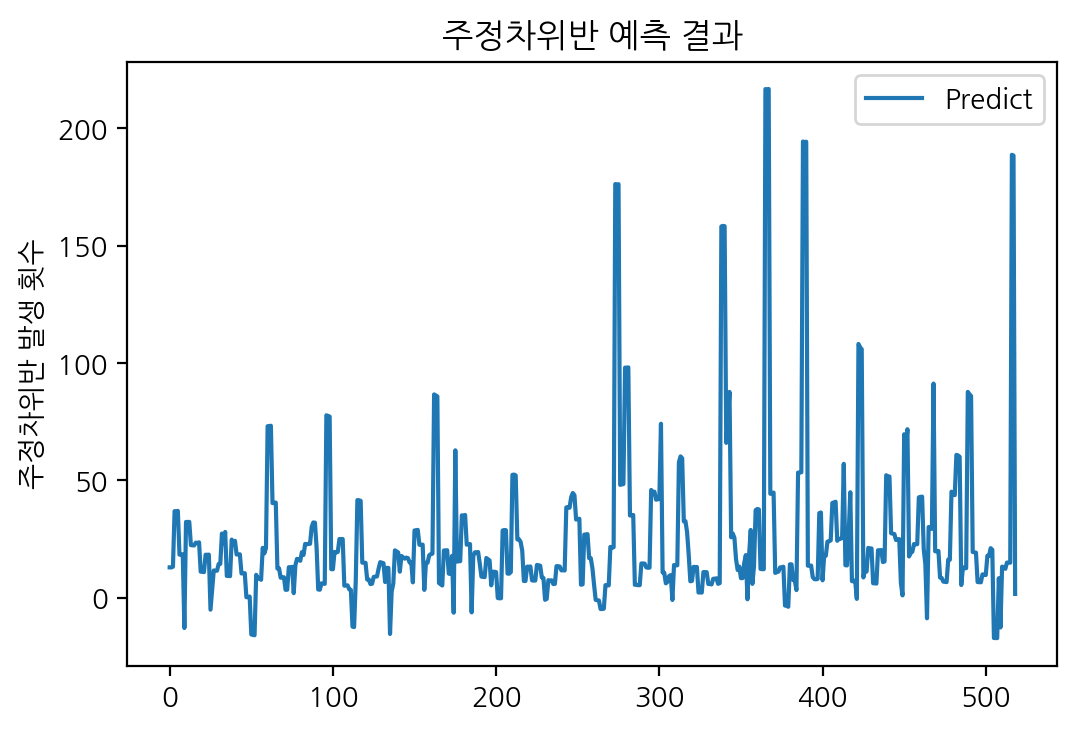

In [56]:
X = df[df['year'] == 2021].groupby(['district', 'month']).mean()[feature].fillna(0)
X = X.values.reshape(-1, 1, len(feature))

plt.figure(dpi=200)
plt.title('주정차위반 예측 결과')
plt.ylabel('주정차위반 발생 횟수')
plt.plot(model.predict(X).reshape(-1, 1), alpha = 1.0, label = 'Predict')
plt.legend()
plt.show()

In [57]:
temp = np.ravel(model.predict(X).reshape(-1, 1), order='C').tolist()
df2023 = df[df['year'] == 2021].groupby(['district', 'month']).mean()
df2023['count'] = temp
df2023 = df2023.groupby('district').mean()
temp = df2023.groupby('district').mean()['count'] - df[df['year'] == 2021].groupby(['district']).size()
df2023['increasing'] = temp
df2023 = df2023[df2023['increasing'] > 0].sort_values('increasing',  ascending=False)[:75][['lat', 'long', 'id', 'age', 'price', 'count', 'increasing']]
df2023['id'] = df2023['id'].astype(int)
df2023.head()

,lat,long,id,age,price,count,increasing
district,,,,,,,
773,35.10278,129.11919,727,0.14985,0.00430,188.56230,184.56230
673,35.12889,129.11436,680,0.25174,0.26204,91.19601,89.19601
403,35.12883,129.09291,400,0.40458,0.21724,74.07711,72.07711
278,35.14225,129.08459,289,0.31168,0.00478,62.75984,61.75984
584,35.12781,129.10587,541,0.26009,0.10895,56.98265,55.98265


In [58]:
df_candidate = pd.concat([df2022,df2023], axis=0, join='outer')
df_candidate = df_candidate.drop_duplicates('id')
df_candidate['how_many'] = (df_candidate['increasing']+0.5).astype(int)
df_candidate = df_candidate.sort_values('increasing',  ascending=False)
df_candidate = df_candidate.dropna(axis=0)
df_candidate
# df_candidate.to_csv('df_candidate.csv', index=False)

,lat,long,id,age,price,count,increasing,how_many
district,,,,,,,,
773,35.10278,129.11919,727,0.14985,0.00430,189.38851,184.38851,184
673,35.12889,129.11436,680,0.25174,0.26204,97.14614,88.14614,88
403,35.12883,129.09291,400,0.40458,0.21724,74.07711,72.07711,72
403,35.12924,129.09296,382,0.40458,0.21724,72.81906,67.81906,68
278,35.14225,129.08459,289,0.31168,0.00478,63.07476,60.07476,60
680,35.11018,129.11314,662,0.49224,0.21754,61.23522,56.23522,56
586,35.12154,129.10751,578,0.37704,0.08832,68.83558,53.83558,54
557,35.11842,129.10539,545,0.58440,0.02059,50.57486,49.57486,50
194,35.12559,129.07717,192,0.47435,0.12779,39.20112,36.20112,36
